# Hyperparameters

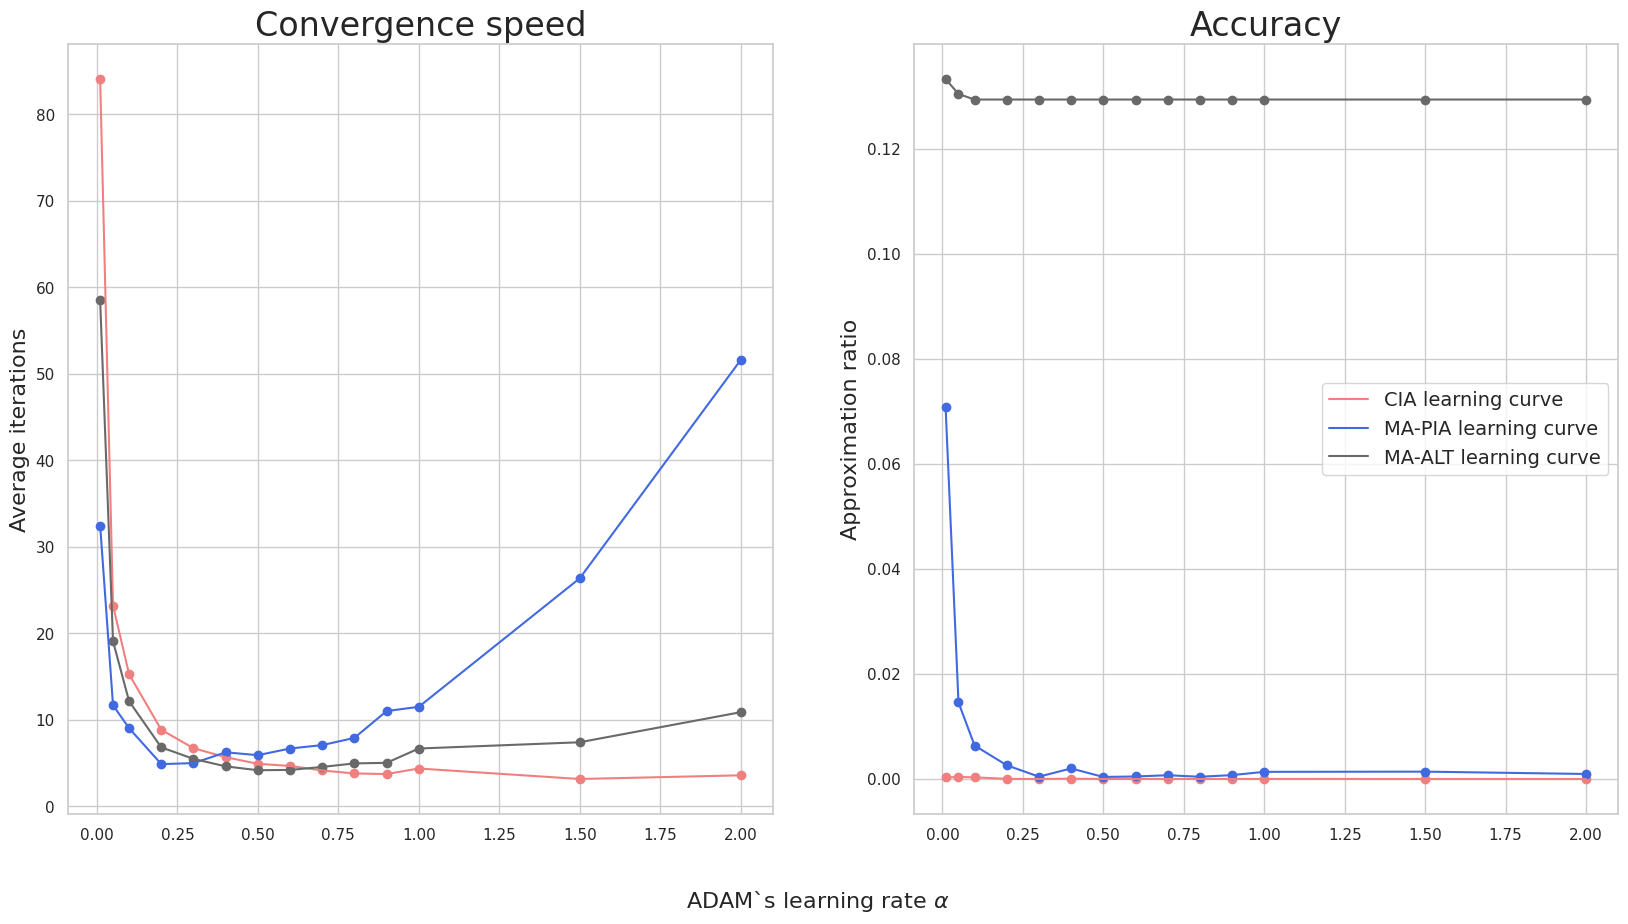

In [52]:

import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np

size = 10

sns.set_theme(style = 'whitegrid')
fig,axs = plt.subplots (nrows = 1, ncols = 2, figsize = (20, 10))

#sr_plot = axs[0]
its_plot = axs[0] 
approx_plot = axs[1]

stepsizes = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]



ansatzes = ['CIA', 'MA-PIA', 'MA-ALT']
colors = {
    'CIA' : 'lightcoral', 
    'MA-PIA' : 'royalblue', 
    'MA-ALT' : 'dimgray'
}

plt.rcParams['axes.titlesize'] = 24    # Заголовок
plt.rcParams['axes.labelsize'] = 16    # Подписи осей
plt.rcParams['xtick.labelsize'] = 10   # Метки оси X
plt.rcParams['ytick.labelsize'] = 10   # Метки оси Y
plt.rcParams['legend.fontsize'] = 14   # Легенда


for ansatz in ansatzes:
    success_rates = []
    average_its = [] 
    approx_ratios = []
    approx_errors = []
    for stepsize in stepsizes:
        
        trainset = pd.read_csv(f'data/train_{ansatz}/Training_size_{size}_stepsize_{stepsize}.csv')


        sr = (len(trainset[trainset['Train (flt)'] == trainset['Test (flt)']]) -1 ) / (len(trainset) - 1)
        
        its_1 = np.array(trainset['Train_iterations_1 (int)'])
        its_2 = np.array(trainset['Train_iterations_2 (int)'])
        its_3 = np.array(trainset['Train_iterations_3 (int)'])
        barens = np.array(trainset['Baren (int)'])

        #print(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
        iterations = np.mean(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
        success_rates.append(sr)
        average_its.append(iterations)

        approx = np.mean(np.abs((trainset['Train (flt)'] - trainset['Test (flt)']) / trainset['Test (flt)']))
        approx_ratios.append(approx)
        approx_errors.append(np.std(np.abs((trainset['Train (flt)'] - trainset['Test (flt)']) / trainset['Test (flt)'])))
    # sr_plot.scatter(stepsizes, success_rates)
    # sr_plot.plot(stepsizes, success_rates)

    its_plot.scatter(stepsizes, average_its, color = colors[ansatz])
    its_plot.plot(stepsizes, average_its, color = colors[ansatz], label = f'{ansatz} learning curve')
    
    #approx_plot.errorbar(stepsizes, approx_ratios, yerr = approx_errors)
    approx_plot.scatter(stepsizes, approx_ratios, color = colors[ansatz])
    approx_plot.plot(stepsizes, approx_ratios, color = colors[ansatz], label = f'{ansatz} learning curve')

# delete zeor line !!!!!!!!!!!!!
#sr_plot.set_title('Success rate')
fig.supxlabel(r'ADAM`s learning rate $\alpha$', fontsize = 16)
its_plot.set_title('Convergence speed')
its_plot.set_ylabel('Average iterations', fontsize = 16)

approx_plot.set_title('Accuracy')
approx_plot.set_ylabel('Approximation ratio', fontsize = 16)
plt.legend()
plt.show()

In [38]:
import numpy as np

a = np.array([1,2,3])
b = np.array([3,2,1])

print(np.maximum(a,b))

[3 2 3]
